## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be found directly in the package keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Task
Build the neural network (CNN) to predict the object in the images. Try to do it on your own first before consulting peers or the tutorials on the internet. If you are stuck early, reach out to our mentors who will point you in the right direction.

In [82]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [121]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [122]:
test_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [123]:
testY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [83]:
test_train = train_labels.reshape(50000,)
test_test = test_labels.reshape(10000,)

In [84]:
from keras.utils import to_categorical
trainY = to_categorical(train_labels)
testY = to_categorical(test_labels)

In [38]:
labs = ['airplanes','cars','birds','cats','deer','dogs','frogs','horses','ships','trucks']

<Figure size 432x288 with 0 Axes>

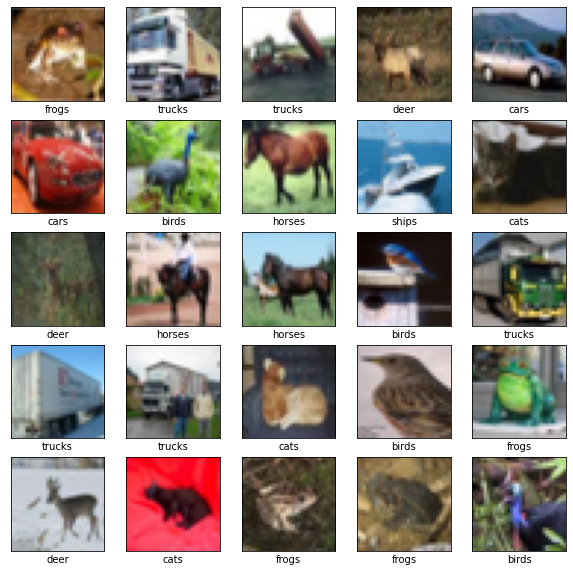

In [39]:
fig1 = plt.figure()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(labs[train_labels[i][0]])

### Data

In [40]:
#train_images train_labels test_images test_labels
train_images = train_images/255
test_images = test_images/255

In [109]:
train_images[0].shape

(32, 32, 3)

### making network

In [53]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Convolution2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Convolution2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(train_images, trainY,epochs = num_epoch,verbose=2, batch_size=64)

Epoch 1/10
782/782 - 83s - loss: 1.1164 - accuracy: 0.6002
Epoch 2/10
782/782 - 72s - loss: 0.8230 - accuracy: 0.7130
Epoch 3/10
782/782 - 76s - loss: 0.6589 - accuracy: 0.7702
Epoch 4/10
782/782 - 72s - loss: 0.5411 - accuracy: 0.8107
Epoch 5/10
782/782 - 71s - loss: 0.4340 - accuracy: 0.8490
Epoch 6/10
782/782 - 71s - loss: 0.3490 - accuracy: 0.8785
Epoch 7/10
782/782 - 73s - loss: 0.2811 - accuracy: 0.9003
Epoch 8/10
782/782 - 70s - loss: 0.2346 - accuracy: 0.9167
Epoch 9/10
782/782 - 70s - loss: 0.1956 - accuracy: 0.9295
Epoch 10/10
782/782 - 70s - loss: 0.1718 - accuracy: 0.9390


In [57]:
model.evaluate(test_images, testY)

313/313 [==============================] - 3s 9ms/step - loss: 0.9874 - accuracy: 0.7603


[0.987357497215271, 0.7602999806404114]

In [58]:
predictions = model.predict(test_images)

<Figure size 432x288 with 0 Axes>

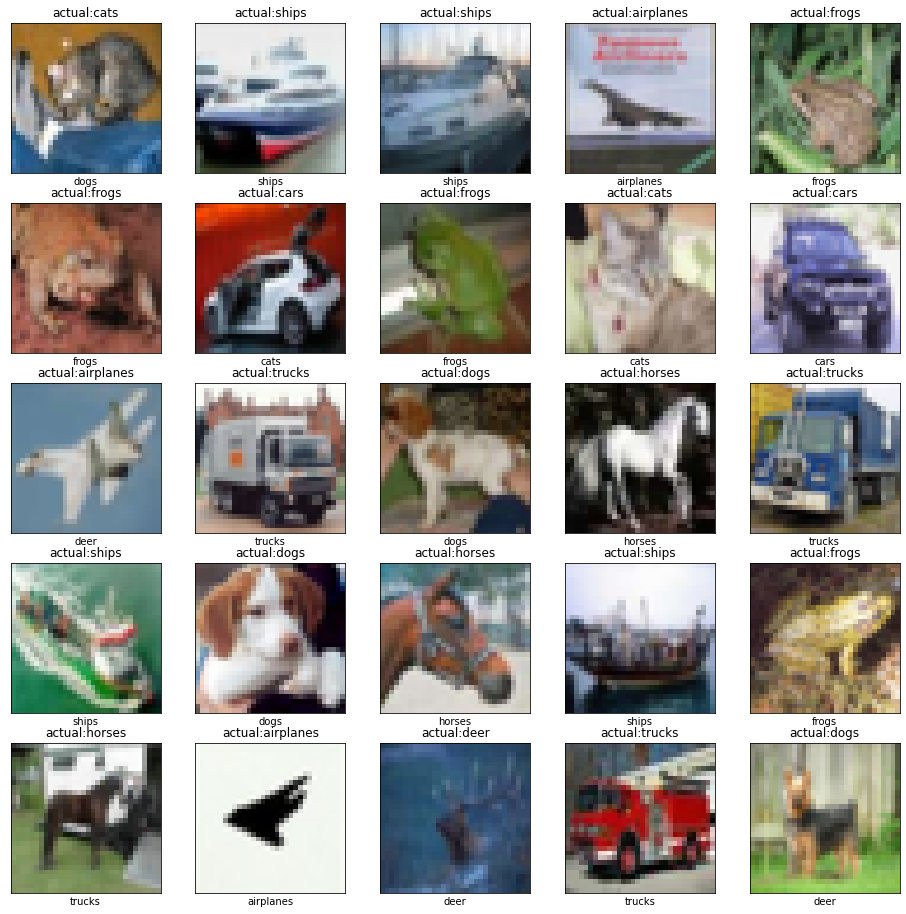

In [64]:
fig1 = plt.figure()
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.title(f'actual:{labs[test_labels[i][0]]}')
    plt.xlabel(labs[np.argmax(predictions[i])])

### Not one hot encoding

In [114]:
test_train.shape

(50000,)

In [115]:
train_images[0].shape

(32, 32, 3)

In [116]:
test_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [117]:
output_size = 10
hidden_layer_size = 128
num_epoch = 10

In [134]:
classifier = Sequential()
classifier.add(Convolution2D(32, 3, input_shape = (32, 32, 3),padding='same', activation = 'relu'))
classifier.add(Convolution2D(32, 3, padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#classifier.add(Convolution2D(64, 3, padding='same', kernel_regularizer=l2(0.001) ,activation = 'relu'))       #weight Decay
classifier.add(Convolution2D(64, 3, padding='same', activation = 'relu'))
classifier.add(Convolution2D(64, 3, padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(Dropout(0.2))   #drop 20# of nodes

classifier.add(Convolution2D(128, 3, padding='same', activation = 'relu'))
classifier.add(Convolution2D(128, 3, padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(hidden_layer_size, activation = 'relu'))
classifier.add(Dense(output_size, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [135]:
classifier.fit(train_images,test_train, epochs = num_epoch,verbose=2)

Epoch 1/10
1563/1563 - 68s - loss: 1.5123 - accuracy: 0.4622
Epoch 2/10
1563/1563 - 68s - loss: 1.0411 - accuracy: 0.6363
Epoch 3/10
1563/1563 - 68s - loss: 0.8810 - accuracy: 0.6939
Epoch 4/10
1563/1563 - 68s - loss: 0.7740 - accuracy: 0.7321
Epoch 5/10
1563/1563 - 68s - loss: 0.7034 - accuracy: 0.7553
Epoch 6/10
1563/1563 - 69s - loss: 0.6528 - accuracy: 0.7732
Epoch 7/10
1563/1563 - 69s - loss: 0.6034 - accuracy: 0.7881
Epoch 8/10
1563/1563 - 69s - loss: 0.5591 - accuracy: 0.8039
Epoch 9/10
1563/1563 - 69s - loss: 0.5093 - accuracy: 0.8227
Epoch 10/10
1563/1563 - 68s - loss: 0.4832 - accuracy: 0.8322


In [136]:
classifier.evaluate(test_images, test_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9431 - accuracy: 0.7227


[0.9431048035621643, 0.7226999998092651]

In [137]:
predictions = model.predict(test_images)

<Figure size 432x288 with 0 Axes>

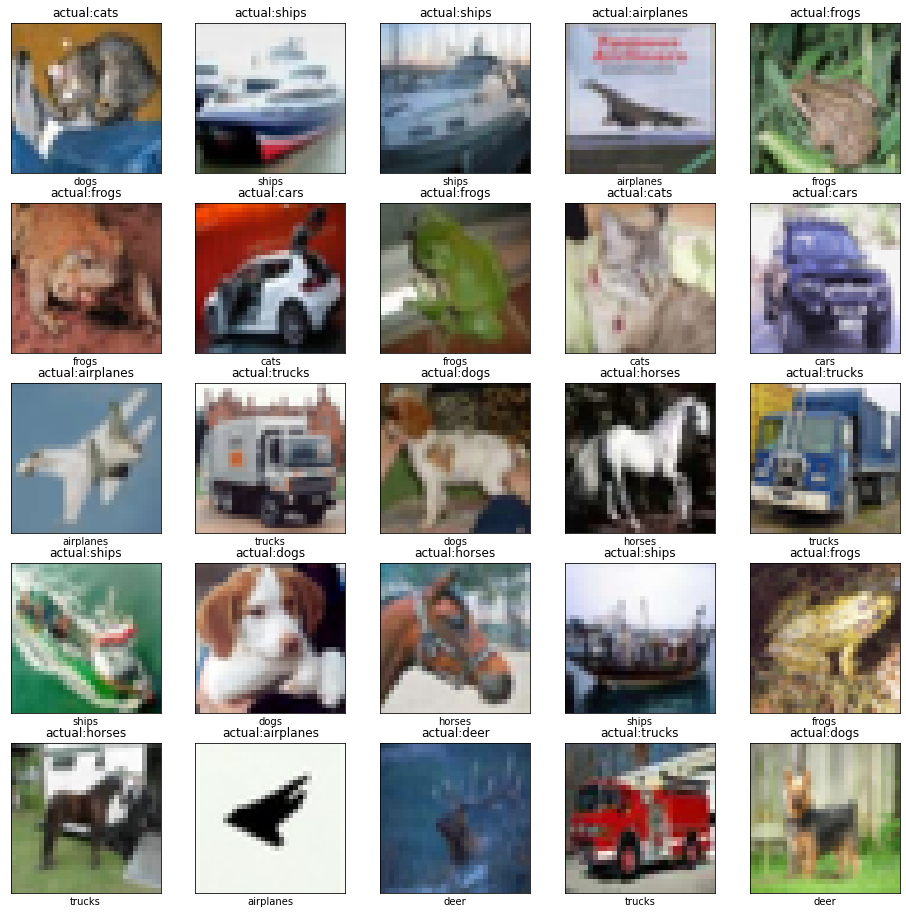

In [138]:
fig1 = plt.figure()
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.title(f'actual:{labs[test_labels[i][0]]}')
    plt.xlabel(labs[np.argmax(predictions[i])])

### augmenting data

In [141]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(train_images, trainY, batch_size=64)

In [142]:
# fit model
steps = int(train_images.shape[0] / 64)
steps

781

In [144]:
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=10, verbose=1)

Epoch 1/10
 63/781 [=>............................] - ETA: 1:09 - loss: 27.0539 - accuracy: 0.1677

KeyboardInterrupt: 

# *Transfer Learning